<a href="https://colab.research.google.com/github/sanikak1910/Machine_Learning/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
salaries = pd.read_csv('/content/position_salaries.csv')

In [4]:
X = salaries.iloc[:,1:-1].values
Y = salaries.iloc[:,-1].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [10]:
# Reshape change the dimensions
# takes rows and columns as input
y = Y.reshape(len(Y),1)

Training would be performed on the whole dataset because we want maximum correlations of data.

In [7]:
X.shape

(10, 1)

In [11]:
y.shape

(10, 1)

Feature Scaling


In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [14]:
sc_Y = StandardScaler()
y = sc_Y.fit_transform(y)

In [15]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [16]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training SVR model

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [20]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualixzing The SVR results

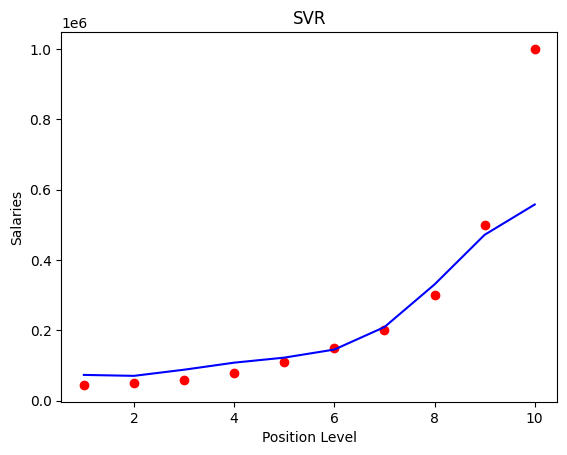

In [21]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

/tmp/ipython-input-22-1035878852.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)


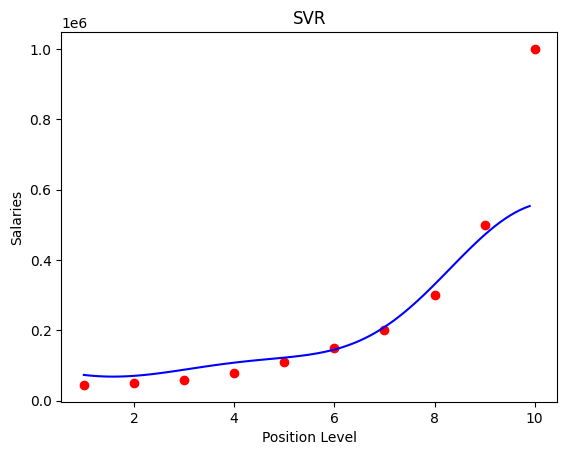

In [22]:
# High Resolution
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()